In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
train_df = pd.read_csv("train_df.csv", sep=',')
test_df = pd.read_csv("test_df.csv", sep=',')
event_df = pd.read_csv("event_df.csv", sep=',')

In [25]:
print(train_df.head())

   id           date  store_visitors
0   0  2023/1/1 5:00               1
1   1  2023/1/1 6:00               1
2   2  2023/1/1 7:00               0
3   3  2023/1/1 8:00               2
4   4  2023/1/1 9:00              21


In [26]:
print(train_df.tail())

          id             date  store_visitors
13102  13102  2024/6/30 16:00              35
13103  13103  2024/6/30 17:00              20
13104  13104  2024/6/30 18:00               8
13105  13105  2024/6/30 19:00               3
13106  13106  2024/6/30 20:00               0


In [27]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13107 entries, 0 to 13106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              13107 non-null  int64 
 1   date            13107 non-null  object
 2   store_visitors  13107 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 307.3+ KB
None


In [28]:
print(train_df.describe())

                 id  store_visitors
count  13107.000000    13107.000000
mean    6553.000000       15.286488
std     3783.809324       17.094921
min        0.000000        0.000000
25%     3276.500000        0.000000
50%     6553.000000        7.000000
75%     9829.500000       28.000000
max    13106.000000      119.000000


In [29]:
print("Nombre de lignes :", len(train_df))

Nombre de lignes : 13107


In [30]:
print(train_df.isnull().sum())

id                0
date              0
store_visitors    0
dtype: int64


In [31]:
train_df["date"] = pd.to_datetime(train_df["date"])
print(train_df[train_df['date'].isnull()])
#affiche la ou ça a echoué

Empty DataFrame
Columns: [id, date, store_visitors]
Index: []


In [32]:
train_df = train_df.drop(columns=['id'])

In [33]:
print("Nombre de doublons (True) : ", train_df.duplicated().sum())
print("Nombre de lignes uniques (False) : ", (~train_df.duplicated()).sum())

Nombre de doublons (True) :  0
Nombre de lignes uniques (False) :  13107


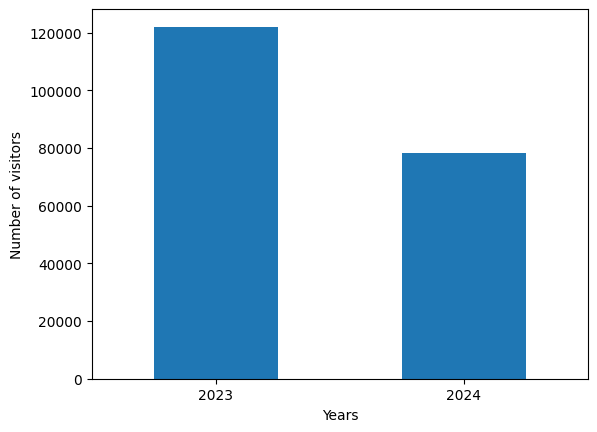

In [34]:
train_df["year"] = train_df["date"].dt.year
visitors_by_year = train_df.groupby('year')['store_visitors'].sum()

visitors_by_year.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Number of visitors')
plt.xticks(rotation = 0)
plt.show()

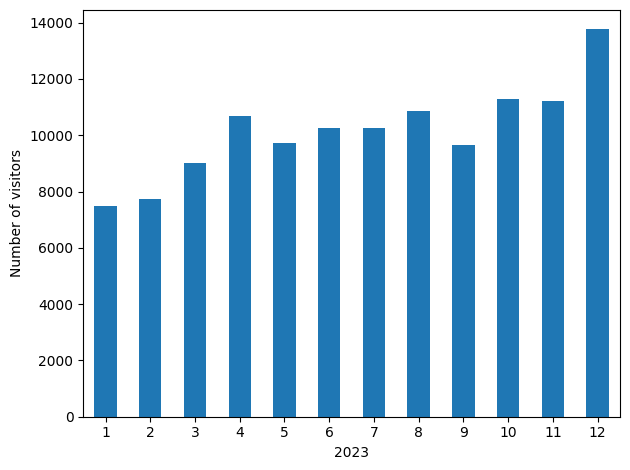

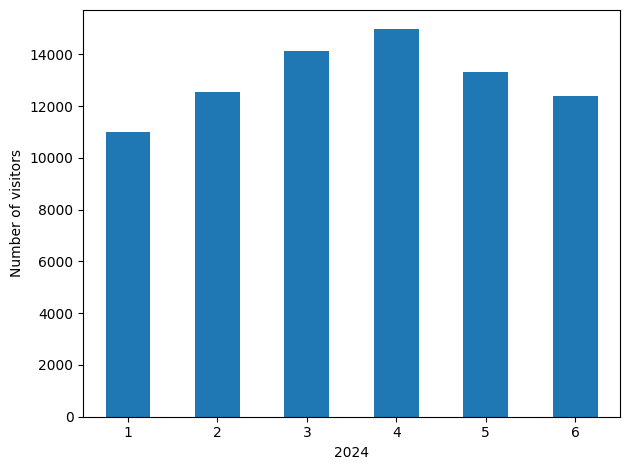

In [35]:
train_df["month"] = train_df["date"].dt.month
years = train_df["year"].unique()

for year in years:
    visitors_by_month = train_df[train_df["year"] == year].groupby("month")["store_visitors"].sum()

    visitors_by_month.plot(kind='bar')
    plt.xlabel(year)
    plt.ylabel('Number of visitors')
    plt.xticks(rotation=0)  
    plt.tight_layout()  
    plt.show()  

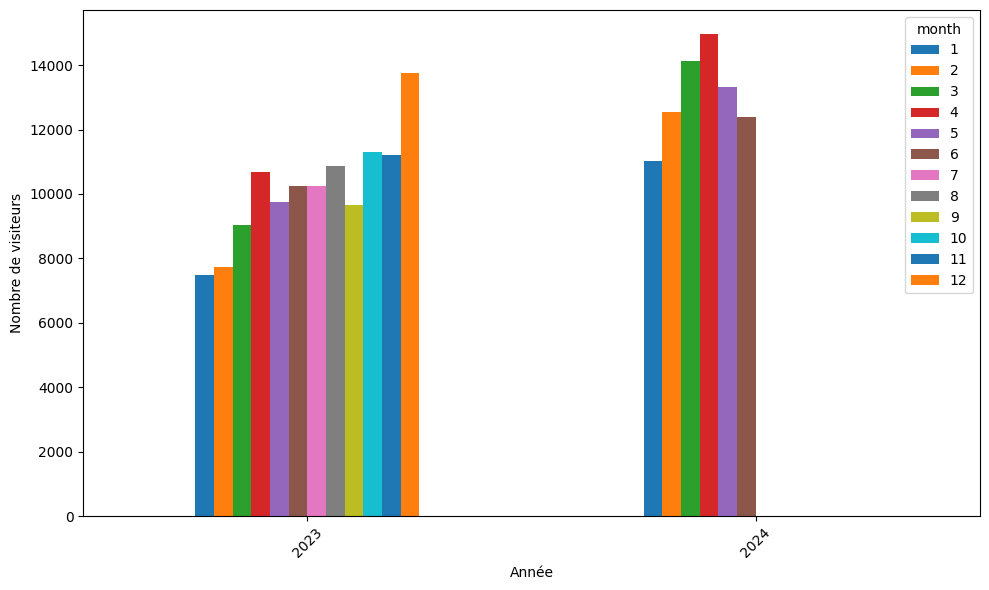

In [36]:
visitors_by_month_year = train_df.groupby(['year', 'month'])['store_visitors'].sum().unstack()

visitors_by_month_year.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Année')
plt.ylabel('Nombre de visiteurs')
plt.xticks(rotation=45)
plt.tight_layout()  # Pour éviter que les labels ne soient coupés
plt.show()

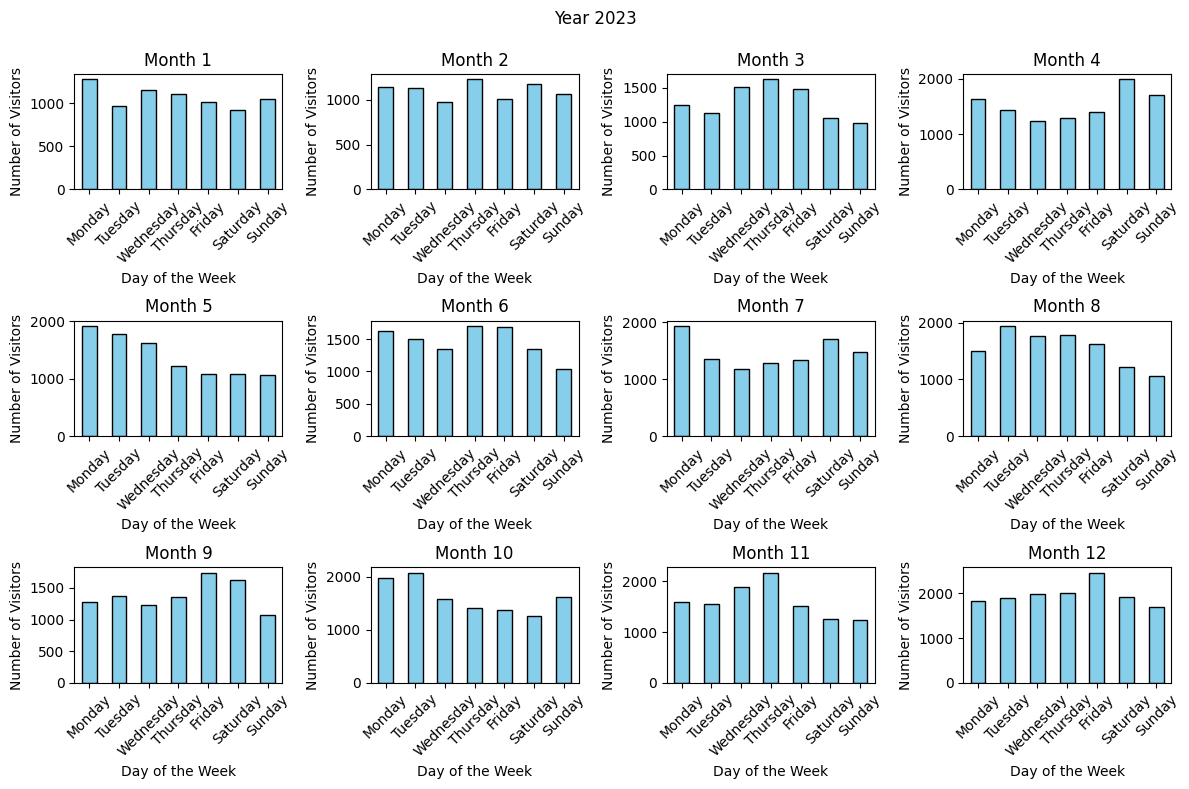

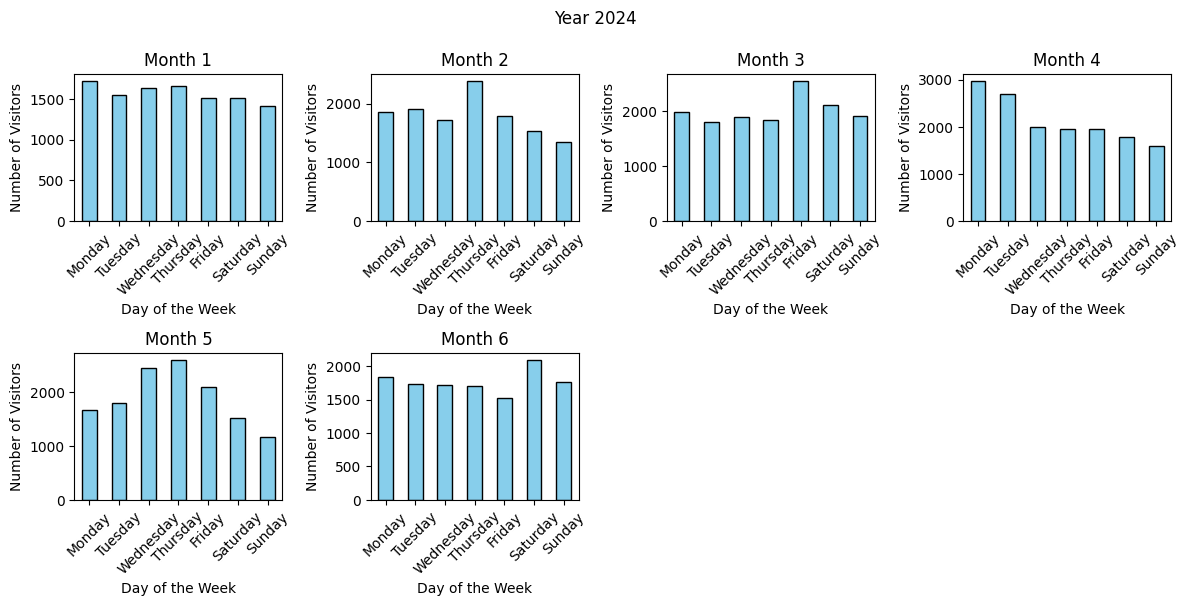

In [37]:
train_df["day_of_week"] = train_df["date"].dt.dayofweek

visitors_by_year_month_day = train_df.groupby(['year', 'month', 'day_of_week'])['store_visitors'].sum()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Réindexer les jours de la semaine pour afficher les noms
visitors_by_year_month_day = visitors_by_year_month_day.unstack('day_of_week')
# Mettre les noms des jours sur les colonnes
visitors_by_year_month_day.columns = days

# Tracer les graphiques pour chaque année
years = train_df["year"].unique()  # Obtenir toutes les années uniques

for year in years:
    plt.figure(figsize=(12, 8))  # Créer une nouvelle figure pour chaque année
    for month in range(1, 13):
        # Filtrer par année et mois
        if (year, month) in visitors_by_year_month_day.index:
            monthly_data = visitors_by_year_month_day.loc[(year, month)]  # Filtrer les données pour le mois et l'année donnés
            ax = plt.subplot(3, 4, month)  # 3 lignes, 4 colonnes pour chaque mois
            monthly_data.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
            ax.set_title(f'Month {month}')
            ax.set_xlabel('Day of the Week')
            ax.set_ylabel('Number of Visitors')
            ax.set_xticklabels(days, rotation=45)

    plt.suptitle(f'Year {year}')  # Ajouter un titre principal pour chaque année
    plt.tight_layout()  # Pour éviter les coupures de texte
    plt.subplots_adjust(top=0.9)  # Ajuster l'espacement pour le titre principal
    plt.show()